# Scikit-Learn (a.k.a sklearn)

it is a library used for modelling (fitting data into models to make predictions)

what we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm  and predict data
4. Evaluate a model
5. Improve the model
6. Save and load a trained model
7. Put it all together

![](./Images/sklearn-complete-workflow.png)

## 0. An end-to-end Sklearn workflow

### 1. Get the data ready

In [1]:
import pandas as pd
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease.target

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 2. Choose the right model and hyperparameters

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)  # default is 100, but shown to see the hyperparams

# We will keep the defalut hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fit the model to our data

In [4]:
from sklearn.model_selection import train_test_split

# spilt the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model (fit the data to it)
clf.fit(X_train, y_train);

In [5]:
# Make a prediction
import numpy as np
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [6]:
y_test

280    0
33     1
123    1
128    1
218    0
      ..
82     1
239    0
250    0
95     1
140    1
Name: target, Length: 61, dtype: int64

### 4. Evaluate the model

In [7]:
clf.score(X_train, y_train)  # does perfectly as it is trained on it

1.0

In [8]:
clf.score(X_test, y_test) 

0.8360655737704918

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [10]:
confusion_matrix(y_test, y_preds)

array([[19,  7],
       [ 3, 32]], dtype=int64)

In [11]:
accuracy_score(y_test, y_preds)

0.8360655737704918

### 5. Imrove the model 

In [12]:
# Try different amount of n-estimators
np.random.seed(42)
for i in range(10, 110, 10):
    print(f"trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

trying model with 10 estimators...
Model accuracy on test set: 83.61%

trying model with 20 estimators...
Model accuracy on test set: 88.52%

trying model with 30 estimators...
Model accuracy on test set: 85.25%

trying model with 40 estimators...
Model accuracy on test set: 81.97%

trying model with 50 estimators...
Model accuracy on test set: 86.89%

trying model with 60 estimators...
Model accuracy on test set: 83.61%

trying model with 70 estimators...
Model accuracy on test set: 83.61%

trying model with 80 estimators...
Model accuracy on test set: 85.25%

trying model with 90 estimators...
Model accuracy on test set: 83.61%

trying model with 100 estimators...
Model accuracy on test set: 83.61%



we can use 70 as n_estimators

### 6. Save a model and load it

In [13]:
import pickle

pickle.dump(clf, open('random_forest_model1.pkl', 'wb'))

In [14]:
loaded_model = pickle.load(open("random_forest_model1.pkl","rb"))
loaded_model.score(X_test, y_test) * 100 

83.60655737704919

#### Note:-

`import warnings
warnings.filterwarnings("ignore")`

ignores all jupyter warnings☝

# Detailed Scikit-learn Workflow

## 0. Standard Library Imports

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Getting our data ready

Three main things we have to do:
   1. Split the data into features and labels (usually `X` and `y`)
   2. Converting non-numerical values to numerical values (a.k.a feature encoding)
   3. Filling (a.k.a imputing) or disregarding missing values

### 1. Splitting the data into features and labels and train and test sets

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### a) Splitting data into features and labels (X and y)

In [17]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### b) Splitting the data into training and test sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 2. Feature Encoding

In [22]:
car_sales = pd.read_csv('./data/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

see what happens if we skip feature encoding

In [24]:
# split the data
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# train test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Fit the data with string values
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)



#### Output:-
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-25-f403f98251bf> in <module>
      3 
      4 model = RandomForestRegressor(n_estimators=100)
----> 5 model.fit(X_train, y_train)
      6 model.score(X_test, y_test)

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\ensemble\_forest.py in fit(self, X, y, sample_weight)
    302                 "sparse multilabel-indicator for y is not supported."
    303             )
--> 304         X, y = self._validate_data(X, y, multi_output=True,
    305                                    accept_sparse="csc", dtype=DTYPE)
    306         if sample_weight is not None:

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\base.py in _validate_data(self, X, y, reset, validate_separately, **check_params)
    431                 y = check_array(y, **check_y_params)
    432             else:
--> 433                 X, y = check_X_y(X, y, **check_params)
    434             out = X, y
    435 

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\utils\validation.py in inner_f(*args, **kwargs)
     61             extra_args = len(args) - len(all_args)
     62             if extra_args <= 0:
---> 63                 return f(*args, **kwargs)
     64 
     65             # extra_args > 0

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\utils\validation.py in check_X_y(X, y, accept_sparse, accept_large_sparse, dtype, order, copy, force_all_finite, ensure_2d, allow_nd, multi_output, ensure_min_samples, ensure_min_features, y_numeric, estimator)
    812         raise ValueError("y cannot be None")
    813 
--> 814     X = check_array(X, accept_sparse=accept_sparse,
    815                     accept_large_sparse=accept_large_sparse,
    816                     dtype=dtype, order=order, copy=copy,

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\utils\validation.py in inner_f(*args, **kwargs)
     61             extra_args = len(args) - len(all_args)
     62             if extra_args <= 0:
---> 63                 return f(*args, **kwargs)
     64 
     65             # extra_args > 0

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\utils\validation.py in check_array(array, accept_sparse, accept_large_sparse, dtype, order, copy, force_all_finite, ensure_2d, allow_nd, ensure_min_samples, ensure_min_features, estimator)
    614                     array = array.astype(dtype, casting="unsafe", copy=False)
    615                 else:
--> 616                     array = np.asarray(array, order=order, dtype=dtype)
    617             except ComplexWarning as complex_warning:
    618                 raise ValueError("Complex data not supported\n"

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\numpy\core\_asarray.py in asarray(a, dtype, order)
     81 
     82     """
---> 83     return array(a, dtype, copy=False, order=order)
     84 
     85 

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\pandas\core\generic.py in __array__(self, dtype)
   1897 
   1898     def __array__(self, dtype=None) -> np.ndarray:
-> 1899         return np.asarray(self._values, dtype=dtype)
   1900 
   1901     def __array_wrap__(

~\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\numpy\core\_asarray.py in asarray(a, dtype, order)
     81 
     82     """
---> 83     return array(a, dtype, copy=False, order=order)
     84 
     85 

ValueError: could not convert string to float: 'Toyota'

we need to convert it to numbers

In [25]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
# Eventhough Doors is numeric, we can classify it into 3 doors, 4 doors, 5 doors

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [28]:
len(set(car_sales["Colour"]))

5

there are 5 different colours in the `car_sales` dataset.

In [29]:
len(set(car_sales["Doors"]))

3

there are 3 different numbers of doors in the `car_sales` dataset.

In [30]:
len(set(car_sales["Make"]))

4

there are 4 different brands of cars in the `car_sales` dataset.

therefore, 5(Colours) + 3(Doors) + 4(Makes) + 1(Odometer) = 13 = no.of rows in the X_transformed dataset

In [31]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])

In [32]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


this is exactly what OneHotEncoder is doing (in an uglier way but detailed way.)

In [33]:
from sklearn.ensemble import RandomForestRegressor
# let's refit our model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y)
model = RandomForestRegressor(n_estimators=100) 
model.fit(X_train, y_train);

In [34]:
model.score(X_test, y_test)

0.26971662820358044

### 3. Filling (a.k.a imputing) or disregarding missing values

In [35]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum() 
# shows the number of missing data in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [38]:
# Feature encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
# Eventhough Doors is numeric, we can classify it into 3 doors, 4 doors, 5 doors

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [39]:
X.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

When we have NaN values, they are made into another column by the `OneHotEncoder`, which makes the data faulty.

In previous versions of sklearn, this would result in a ValueError

In [40]:
type(transformed_X)

scipy.sparse.csr.csr_matrix

#### Option 1: Fill missing data with Pandas

In [41]:
# Fill the 'Make' column
car_sales_missing["Make"].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing["Colour"].fillna('missing', inplace=True)

# Fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

we have not imputed Price as it is better to remove the rows without the price

In [43]:
car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
len(car_sales_missing)

950

we have lost 50 rows of data

In [46]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [47]:
# Feature encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
# Eventhough Doors is numeric, we can classify it into 3 doors, 4 doors, 5 doors

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# 

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	`with 3800 stored elements` in Compressed Sparse Row format>

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	`with 4000 stored elements` in Compressed Sparse Row format>


Therefore 4000-3800 = 200 elements are lost 

In [48]:
# Feature encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
# Eventhough Doors is numeric, we can classify it into 3 doors, 4 doors, 5 doors

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing data with Scikit-Learn

In [49]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
# Drop the rows without a target value (Price value)
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [52]:
# Split into X & y
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing.Price

In [53]:
# Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with the mean value of the column
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_features', num_imputer, num_features)
])  # ColTrans([('name', imputer, features/columns)])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [54]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [55]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
# Eventhough Doors is numeric, we can classify it into 3 doors, 4 doors, 5 doors

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [57]:
# fit a model for trial
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

#### this one performed worse than the first one as there was less data and some of our data was having 'missing' value

In [58]:
len(car_sales_filled), len(car_sales)

(950, 1000)

#### But, more data does NOT mean better results

## 2. Choosing the right estimator/algorithm for our problems

Scikit-Learn uses estimator as another term for machine learning model or algorithm

the most used algorithm types are:-

1. Regression - predicting a number (car sales prediction problem)

2. Classification - predicting whether a sample is one thing or the other (heart disease classification problem)


the link for the map:- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![](./Images/sklearn-algorithm-map.png)

### 1. Picking a model for a regression problem

In [59]:
# Import Boston housing dataset
from sklearn.datasets import load_boston

boston_dict = load_boston()
boston_dict;

In [60]:
boston = pd.DataFrame(boston_dict['data'], columns=boston_dict['feature_names'])
boston['target'] = pd.Series(boston_dict["target"])
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [61]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

the thing has no NaN values

In [62]:
len(boston)

506

In [63]:
# Ridge Regression model
from sklearn.linear_model import Ridge

# setup a random seed
np.random.seed(42)

# Create X and y
X = boston.drop('target', axis=1)
y = boston.target

# Create test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# Instantiate the Ridge model
model = Ridge()

# fit the data to the model
model.fit(X_train, y_train)

# score the models's performance on the test dataset
model.score(X_test, y_test)

0.6662221670168519

#### Ignore the below code. it is a trial.

#### SVM is bad

In [64]:
# Support vector machines
from sklearn.svm import SVR

# setup a random seed
np.random.seed(42)

# Create X and y
X = boston.drop('target', axis=1)
y = boston.target

# Create test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# Instantiate the Ridge model
model = SVR()

# fit the data to the model
model.fit(X_train, y_train)

# score the models's performance on the test dataset
model.score(X_test, y_test)

0.27948125010200286

### how to improve Ridge?

In [65]:
# We can use ensemble methods (RandomForest)
from sklearn.ensemble import RandomForestRegressor

# Setup the random seed
np.random.seed(78)

# Create X&y
X = boston.drop('target', axis=1)
y = boston.target

# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# Instantiate the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100) #the n_estimators is usually 100. I randomly changed it to 100

# Fit the data
model.fit(X_train, y_train)

# Score the model's performance on test dataset
model.score(X_test, y_test)

0.9186215803864948

#### Note :- Ensemble models are generally better than others, as they are a group of other models learning from each other and assessing each other

### 2. Picking a model for a classification problem

In [66]:
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
len(heart_disease)

303

In [68]:
# Import the LinearSVC estimator (as per the map)
from sklearn.svm import LinearSVC

# random seed
np.random.seed(42) # with 78, the result is 0.72
# split the data into X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)
clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\abc\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

really good, but let's try and improve for learning purposes

In [69]:
# Import the Randomforestclassifier estimator (as per the map)
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42) # with 78(random no.), the result is 0.72
# split the data into X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)
clf2 = RandomForestClassifier(n_estimators=200)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.8688524590163934

did not improve 

but usually ensemble are better

Tip:
1. If we have structured data, use ensemble models
2. If we have unstructured data, use deep learning        or transfer learning
    
structured data - tabular data
unstructured data - images, videos, audio

## 3. Fit the model on our data and use it to make predictions

### 3.1) For Classification
### 3.1.1) Fit the data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [70]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [71]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [72]:
# Import the Randomforestclassifier estimator (as per the map)
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42) # with 78(random no.), the result is 0.72
# split the data into X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)
# Instantiate the CLF (standard OOPS procedure)
clf2 = RandomForestClassifier(n_estimators=200)
# fit the model (finds patterns between X and y)
clf2.fit(X_train, y_train)
# score the model (uses the pattern to predict another X and y and scores the accuracy) will do more about it later
clf2.score(X_test, y_test)

0.8688524590163934

`.fit()` takes the corresponding `X` and `y` samples and finds patterns in them. This is the trained model

`.score()` uses this pattern and predicts a `y` based on another `X`. Then, it verifies it with the answer (the real `y`) and gives out the accuracy

### 3.1.2) Making predictions with the model

2 ways to make predictions:-
1. `predict()`
2. `predict_proba()`

#### Use a trained model to make predictions

In [73]:
y_preds = clf2.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
# Compare predictions to truth labels to evaluate the model
np.mean(y_preds==y_test)  # compares element wise and gives the mean

0.8688524590163934

In [76]:
np.mean(y_preds==y_test) == clf2.score(X_test, y_test)

True

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

In [78]:
np.mean(y_preds==y_test) == clf2.score(X_test, y_test) == accuracy_score(y_test, y_preds)

True

#### predict_proba

In [79]:
# predict_proba() returrns probalbilities of a classification problem
clf2.predict_proba(X_test[:5])

array([[0.88 , 0.12 ],
       [0.445, 0.555],
       [0.415, 0.585],
       [0.88 , 0.12 ],
       [0.195, 0.805]])

the out put is in

`[[no heart disease probability, heart disease probability],
[no heart disease probability, heart disease probability]]` and so on

In [80]:
clf2.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

as `no heart disease probability` is more in the first array, the prediction is 0 and so on

in the second array `[0.445, 0.555]`, the numbers are pretty close.
This means the model is not too sure.
That is why the `y_preds` and the `y_test` have different values(the answer is wrong)

### 3.2) For Regression

In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = boston.drop('target', axis=1)
y = boston["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [82]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [83]:
np.array(y_test)

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [84]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.136382352941176

mean_absolute_error finds the mean of the sum of difference between y_test and y_preds.

It is an evaluation metric (next section)

## 4. Evaluating a model

#### Both Clasification and Regression have different evaluating methods

Three ways to evaluate Scikit-Learn models:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 1) Evaluating a model with the score method

In [85]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
heart_disease = pd.read_csv("./data/heart-disease.csv")
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Modelling
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### .score()

In [86]:
clf.score(X_test, y_test)

0.8524590163934426

In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = boston.drop('target', axis=1)
y = boston["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [88]:
model.score(X_test, y_test)

0.8654448653350507

press `shift+tab` inside both `clf.score()` and `model.score()`

notice the difference in the docstring?

### 2) Evaluating a model using the `scoring` parameter

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [90]:
clf.score(X_test, y_test)

0.8524590163934426

In [91]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [92]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take mean of the 5-fold cross-validation-score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [93]:
# Scoring parameters set to none

cross_val_score(clf, X, y, cv=5, scoring=None);  # default (None) is mean accuracy (as it is a classifier)

### 2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_score = 0.2)

clf = RandomForestClassifier()
cvs = cross_val_score(clf, X, y, cv=5)

In [95]:
cvs.mean()

0.8248087431693989

In [96]:
print(f'Heart Disease Classifier Accuracy: {cvs.mean() * 100:.2f}')

Heart Disease Classifier Accuracy: 82.48


**Area under Receiver Operating Characteristic (ROC) curve**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (TPR) versus a model's false postive rate (FPR)

* A true positive = the model predicts 1 and the truth is one
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
from sklearn.metrics import roc_curve

# fit the model
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [99]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [100]:
# calculate FPR, TPR, thresholds
fpr, tpr, thesh = roc_curve(y_test, y_probs_positive)

# check the fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

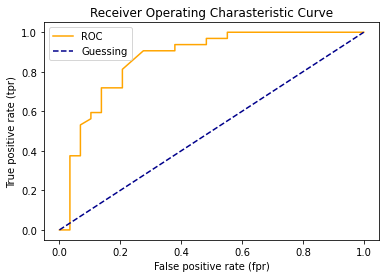

In [101]:
# Create a function or plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given fpr and tpr of a model
    '''
    plt.plot(fpr, tpr, color='orange', label='ROC')
    #  Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    #  customize
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Charasteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)  

In [102]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

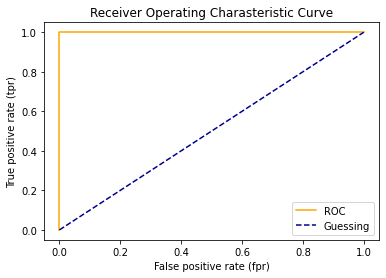

In [103]:
# plot perfect ROC curve and AUC curve
fpr, tpr, thresh = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [104]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it wassupposed to predict

Basically, it gives you an idea of where the model if getting confused.

In [105]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [106]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [107]:
22 + 7+ 8 +24

61

In [108]:
len(y_preds)

61

So, basically, it shows how many times the actual answer was 0 or 1, but the model gave a wrong answer

when the actual answer was 0, 23/29 times, it gave a zero and
when the actual answer was 1, 26/32 times, it gave a one

In [109]:
32 + 29

61

![](./Images/Confusion_matrix.png)

you can install a library in the conda prompt, or:-

import sys
!conda install --yes --prefix {sys.prefix} seaborn

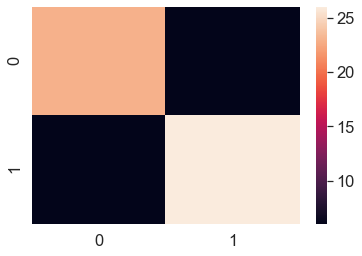

In [110]:
# Visualizing a confusion matrix with Seaborn's heatmap()
import seaborn as sns

# set font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf = confusion_matrix(y_test, y_preds)

# plot using seaborn
sns.heatmap(conf);

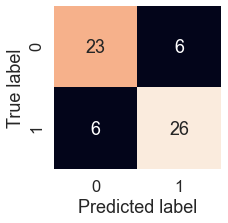

In [111]:
def plot_conf(conf):
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf, 
                     annot=True, # Annotate the boxes with conf info
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf(conf)

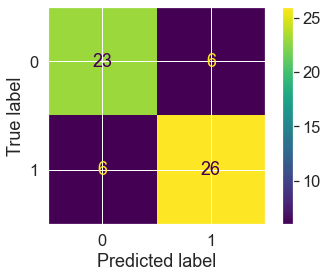

In [112]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

way easier

**Classification Report**

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



![](./Images/Classification-report.png)

* Precision - shows the percentage of the time when the model predicts the correct value for both 1 and 0 (81% and 79% respectively) (true positive / true postive + false positive)

* Recall - shows how many correct values were predicted in both 0 and 1 (81% and 79% respectively) (true positive / true postive + false positive)

* F1 score - combination of both

* Support - the no of samples inboth 1 and 0

* Accuracy - the accuracy of the model in decimal form(the output of the .score())

* Macro avg - avg of recall, precision, and F1 (avg of 3(81%) and 3(79%) = 80%). doesn't take class imbalance into account.

* Weighted avg - Macro avg that takes the class imbalance into consideration



****note:- as there are no class imbalances in our data (too many ones and too less zeroes or vice versa), te Macro avg and Weighted avg are the same****

**When to use the other evaluation metrics and not .score()**

1. precision and recall

In [114]:
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\abc\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\OneDrive\Desktop\ml_course\tutorial_part\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


we can see that the accuracy is 99.99%, but the others are quite low

macro avg weighted avg are different due to class imbalance

the model never has predicted 1 as it hasn't been trained on it

here we can see that the precision, recall, f1 are 0.0 and macro avg is very low

this is where the classification_report is useful

**So, make sure you use the classfication report for a wholesome report of how good the model actually is**

to summarize clasification metrics:-
* **Accuracy** is a good measure to start with if all classes are balanced

* **Precision** and **Recall** become important when the classes are imbalanced

* If false positives predictions are worse than false negatives, aim for higher **precision**

* If false negatives predictions are worse than false positives, aim for higher **recall**

* **F1-score** is a combination of precision and recall 

* If classes are imbalanced, watch out for the **Macro avg**


### 2.2 Regression model evaluation metrics

model evaluation documentation - https://scikit-learn.org/stable/modules/model_evaluation.html


1. R^2 or coefficient of determination
2. Mean Ablsolute Error (MAE)
3. Mean Squared Error (MSE)

**R^2 or cofficient of determination**

What R-squared does: Compares your model's predictions to the mean of the targets. Values of R-squared can range from negative infinty(crap) to 1(too good)

For example, if all your model can does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1. 

In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston.drop('target', axis=1)
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [116]:
reg.score(X_test, y_test)

0.8654448653350507

In [117]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [118]:
r2_score(y_test, y_test_mean)

0.0

In [119]:
r2_score(y_test, y_test)

1.0

the mean is halfway there, so it gets a 0, but if your thing is really off in its predictions, we can get a -number

**Mean Absolute Error (MAE)**

MAE is the avg of the absolute differences between predictions and the actual values. It gives you an idea of how off your model's predictions are.

In [120]:
from sklearn.metrics import mean_absolute_error

y_preds = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)

In [121]:
mae

2.136382352941176

In [122]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [123]:
df['difference'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


In [124]:
array = np.array(abs(df['difference']))
np.mean(array)

2.136382352941176

#### Mean of  absolute of Errors, get it?

**Mean Squared Error (MSE)**

MSE squares the difference between the `true y` and `predicted y` and then finds the avg

In [125]:
from sklearn.metrics import mean_squared_error

y_preds = reg.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

In [126]:
mse

9.867437068627442

In [127]:
# Manually Calculated MSE
sqr = np.square(df['difference'])
sqr.mean()

9.867437068627442

The below answer will not be equal to the MAE as the values are squared **before** the averaging and not the vice versa

In [128]:
np.sqrt(sqr.mean())

3.1412476929760635

![](./Images/regression.png)

**Maximise the R^2 metric and
minimize MAE and MSE**

There are way more evaluation metrics than this

### 2.3 `Scoring` Parameter (what we had left)

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [130]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [131]:
# Cross-validated accuracy

print(f'The cross-validated acccuracy is: {np.mean(cv_acc) * 100:.2f}%')

The cross-validated acccuracy is: 82.48%


In [132]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy') # defalut is accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [133]:
print(f'The cross-validated acccuracy is: {np.mean(cv_acc) * 100:.2f}%')

The cross-validated acccuracy is: 82.48%


In [134]:
np.random.seed(42)
cv_prec = cross_val_score(clf, X, y, cv=5, scoring='precision') # defalut is accuracy
cv_prec

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [135]:
print(f'The cross-validated acccuracy is: {np.mean(cv_prec) * 100:.2f}%')

The cross-validated acccuracy is: 83.30%


In [136]:
cv_rec = cross_val_score(clf, X, y, cv=5, scoring='recall')
np.mean(cv_rec)

0.8424242424242424

In [137]:
cv_f1 = cross_val_score(clf, X, y, cv= 5, scoring='f1')
cv_f1.mean()

0.8298583662714097

In [138]:
# regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston.drop('target', axis=1)
y = boston['target']

reg = RandomForestRegressor()

In [139]:
cv_r2 = cross_val_score(reg, X, y, cv=5, scoring='r2')
cv_r2.mean()

0.6243870737930857

In [140]:
cv_mae = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [141]:
cv_mae.mean()

-3.003222869345758

In [142]:
cv_mse = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [143]:
cv_mse.mean()

-21.12863512415064

### 3. Metric functions

the above evaluation metrics are als functions that can be imported

**Classification evaluation functions**

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [145]:
y_preds = clf.predict(X_test)

In [146]:
# Evaluate the clf
print('Classifier metrics on the test set: ')
print(f'Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds) * 100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds) * 100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds) * 100:.2f}%')

Classifier metrics on the test set: 
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression evaluation function**

In [147]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston.drop('target', axis=1)
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

reg = RandomForestRegressor()
reg.fit(X_train, y_train);

In [148]:
y_preds = reg.predict(X_test)

In [149]:
print('Regression metrics on test set: ')
print(f'R-squared: {r2_score(y_test, y_preds) * 100:.2f}%')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_preds):.2f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_preds):.2f}')

Regression metrics on test set: 
R-squared: 86.54%
Mean Absolute Error: 2.14
Mean Squared Error: 9.87


## 5. Improve a model

First predictions - baseline predictions.

First model - baseline model.

### How to Improve?

1) From a data perspective:-
    * Add more relevant data
    * Improve existing data (add features, clean data)

2) From a model perspective:-
    * Is there a better model we could use?
    * Colud we improve the existing model (tuning the hyperparameters)


### Hyperparameters vs. Parameters
Parameters - model finds these patterns in the data

Hyperparameters - settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust the Hyperparameters:
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [150]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 1. Tuning Hyperparameters By Hand

**Till now, we have used Train and test datasets, but tuning hyperparameters introduces a new set - the Validation Set**

***The validation set will be used to tune the hyperparameters.***

***The usual split is: 70 (Train), 15 (Validation) and 15 (Test)***

**We are going to adjust the following hyperparameters:**
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [151]:
def evaluate_clf(y_true, y_preds):
    '''
    Performs evaluation comparisons on y_true labels vs. y_pred labels 
    on a classification model
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   'precision': round(precision, 2),
                   "recall": round(recall, 2),
                   'f1': round(f1, 2)}
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1: {f1 * 100:.2f}%')
    
    return metric_dict

In [152]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease = heart_disease.sample(frac=1)

X = heart_disease.drop('target', axis=1)
y = heart_disease.target

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease))
valid_split = round(train_split + 0.15 * len(heart_disease))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

evaluate_clf(y_valid, y_preds)

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [153]:
np.random.seed(42)

# Create a second classifier with different hyperparams
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds2 = clf.predict(X_valid)

baseline_metrics = evaluate_clf(y_valid, y_preds2)
baseline_metrics

Accuracy: 82.22%
Precision: 84.00%
Recall: 84.00%
F1: 84.00%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [154]:
np.random.seed(42)

# Create a second classifier with different hyperparams
clf2 = RandomForestClassifier(n_estimators=100, max_depth=2)
clf2.fit(X_train, y_train)

y_preds3 = clf2.predict(X_valid)

clf2_metrics = evaluate_clf(y_valid, y_preds3)
clf2_metrics

Accuracy: 84.44%
Precision: 82.14%
Recall: 92.00%
F1: 86.79%


{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.92, 'f1': 0.87}

### 2. Tuning Hyperparameters with RandomizedSearchCV

In [155]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 4, 6]}

In [156]:
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, # number of combination of hyperparams to try
                            cv=5,
                            verbose=2)

# Fit the data onto rs_clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

Combines cross-validation and hyperparameter tuning.

Uses `cv` to train mdel and tests it while changing hyperparameters

In [157]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [158]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate
rs_metrics = evaluate_clf(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 77.42%
Recall: 85.71%
F1: 81.36%


The model has become worse

to make the RandomizedCV better, we can add more `cv` or more `n_iter`

### 3. Tuning Hyperparameters Exhaustively with GridSearchCV

Works like RandomizedSearchCV, but tries every single pattern possible with a specified `cv`.

In [159]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6]}

In [160]:
total_patterns = 6 * 5 * 2 * 3 * 3 *5
print(f'The total number of models the GridSearchCV is: {total_patterns} model')

The total number of models the GridSearchCV is: 2700 model


that is too much

In [161]:
grid2 = {'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2],
        'min_samples_split': [6]}  # reduced search space of hyperparams based on best params of RandomizedSearchCV

In [162]:
3 * 1 * 2 * 2 * 1 * 5

60

In [163]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid2, 
                      cv=5, 
                      verbose=2)

# Fit the data onto rs_clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [164]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [165]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate
gs_metrics = evaluate_clf(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1: 77.97%


Compare models

In [166]:
np.random.seed(42)
# baseline
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
baseline_metrics = evaluate_clf(y_test, clf.predict(X_test))

# manual
clf2 = RandomForestClassifier(n_estimators=100, max_depth=2)
clf2.fit(X_train, y_train)

y_preds3 = clf2.predict(X_valid)

clf2_metrics = evaluate_clf(y_valid, y_preds3)
clf2_metrics

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1: 77.97%
Accuracy: 84.44%
Precision: 80.00%
Recall: 96.00%
F1: 87.27%


{'accuracy': 0.84, 'precision': 0.8, 'recall': 0.96, 'f1': 0.87}

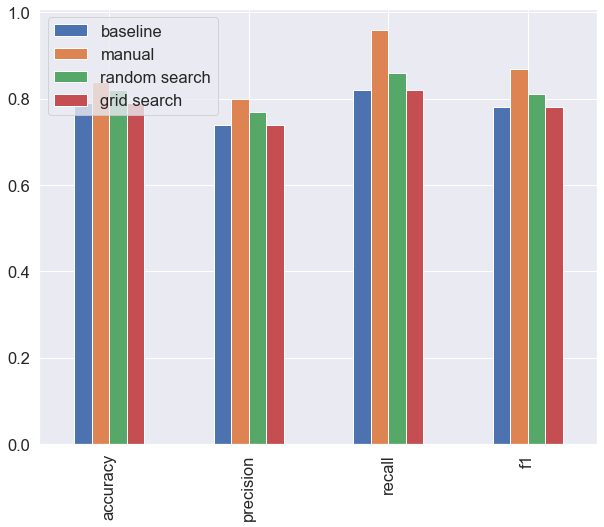

In [167]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'manual': clf2_metrics,
                                'random search': rs_metrics,
                                'grid search': gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

**note:-
This thing is unpredictable**

**To attain the best possible prediction, we may have to change the data**

**This is called forward backward attribute selection:-**

**we can either train our model on all the features and remove some which are dependant on other features (backward)**

**Or, we can train our model on only 1 column and increase the number of columns to see which one has best accuracy (forward)**


## 6. Save and load a trained model

two ways:-
1. Python's pickle module
2. Joblib module

**Pickle Method**

In [168]:
import pickle as pkl

# Save an existing model to file
pkl.dump(gs_clf, open('gs_clf_model1.pkl', 'wb'))

In [169]:
# Load the .pkl file
loaded = pkl.load(open('gs_clf_model1.pkl', 'rb'))

In [170]:
# Make predictions
pkl_preds = loaded.predict(X_test)
evaluate_clf(y_test, pkl_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

works

**Joblib**

In [171]:
from joblib import dump, load

# Save the model
dump(gs_clf, filename='gs_clf_model.joblib')

['gs_clf_model.joblib']

In [172]:
# Import the joblib model

loaded = load(filename='gs_clf_model.joblib')

In [173]:
# make and evaluate preds
joblib_preds = loaded.predict(X_test)
evaluate_clf(y_test, joblib_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together

### 7.0 Standard library import

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 7.1 Prepare the data

In [175]:
data = pd.read_csv('./data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [176]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [177]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Instead of doing what we did in data preprocessing, we will use Sklearn's Pipeline

What we have to do (in one cell):
1. Fill missiing data
2. Convert data to numbers
3. Build a model on the data

In [178]:
# data related
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# model related
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

# Import the data and drop the rows with missing labels
data = pd.read_csv('./data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define the features and the different transformer Pipelines
categorical_features = ['Make', 'Colour'] # Doors not included as it is numeric
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])


# Setup the preprocessing steps (imputing, encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_features),
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# Create a preproceesing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', RandomForestRegressor())])

# Split data
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)
# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

**What is happening:-**

**The categorical_transformer, door_transformer and numeric_transformer run both imputing and onehotencoder together. ColumnTransformer runs all of these and applies them on the data.
the model runs the columntransfremer and the RandomForestRegressor**

We can use `GridSearchCV` and `RandomizedSearchCV` with Pipeline

In [180]:
# Use GridSearchCV with regression pipeline 
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'], # __ is like a . in an import statement
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]
    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
       

In [181]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [184]:
dump(gs_model, filename='gs_model.joblib')
loaded = load(filename='gs_model.joblib')

joblib_preds = loaded.predict(X_test)

In [187]:
joblib_preds[:10]

array([18831.11287954, 19830.65565182, 11237.08225081, 10416.19971048,
       10013.2189864 , 10905.74004745, 15946.63706921, 10906.85575995,
       18896.75416608, 15430.03683087])

In [190]:
print('done!!')

done!!


In [1]:
import sklearn
sklearn.__version__

'0.24.1'

# DONE